In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2
from cmblib import *

In [3]:
cmb = CMBspectra(lmax=3000)

In [4]:
N = 2**10  
pix_size  = .5
c_min = -400 
c_max = 400  
X_width = N*pix_size/60. 
Y_width = N*pix_size/60.

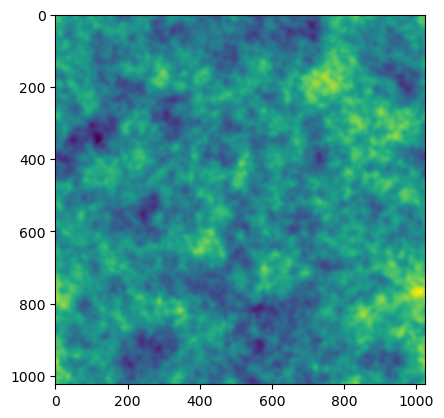

In [5]:
unlensed_t = cl2map(N,pix_size,cmb.ell,cmb.unlensed_spectra[:,0])
plt.imshow(unlensed_t)

In [6]:
l, cl_tt = map2cl(unlensed_t,50,3000,pix_size,N)

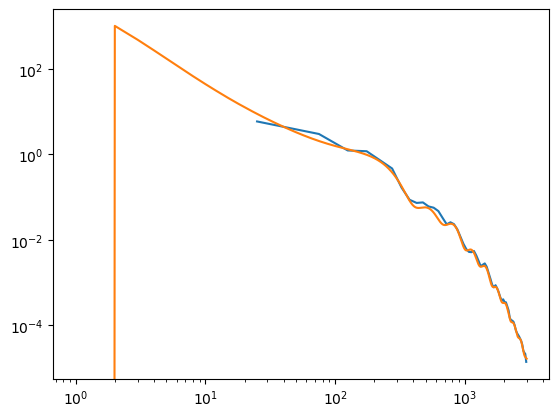

In [7]:
plt.loglog(l,cl_tt)
plt.loglog(cmb.ell,cmb.unlensed_spectra[:,0])

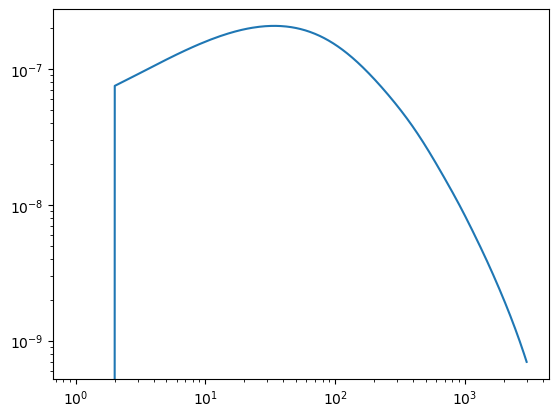

In [8]:
plt.loglog(cmb.ell,cmb.lensing_spectra[:,0]*cmb.dl_KK)

In [9]:
cl_KK = cmb.lensing_spectra[:,0]*cmb.dl_KK 

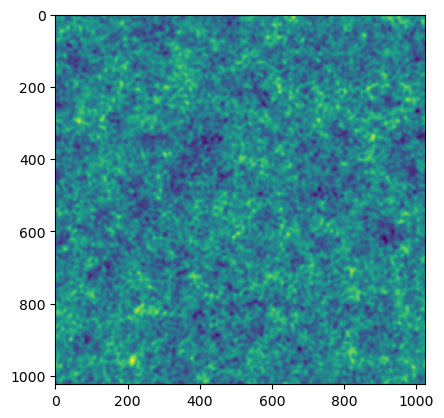

In [10]:
kappa = cl2map(N,pix_size,cmb.ell,cl_KK)
plt.imshow(kappa)

Text(0.5, 1.0, 'difference')

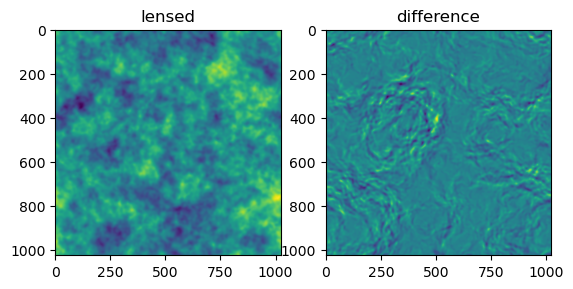

In [11]:

ly,lx,modlmap = get_ells(N,pix_size)

lensed = lens_map(unlensed_t,kappa,modlmap,ly,lx,N,pix_size)

plt.subplot(1,2,1)
plt.imshow(lensed)
plt.title('lensed')
plt.subplot(1,2,2)
plt.imshow(lensed-unlensed_t)
plt.title('difference')

In [12]:
ell = cmb.ell

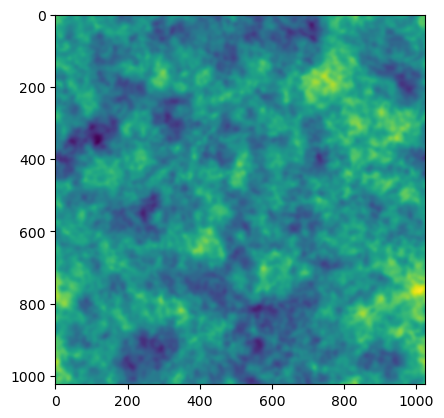

In [15]:

beam_arcmin = 1.4


kbeam2d = gauss_beam(modlmap,beam_arcmin)

beamed = filter_map(lensed,kbeam2d)


noise_uk_arcmin = 1.5 

Clnoise = (noise_uk_arcmin*np.pi/180./60.)**2.
Dlnoise = Clnoise*np.ones(ell.size)

noise_map = cl2map(N,pix_size,ell,Dlnoise)


observed = beamed + noise_map

plt.imshow(observed)

Text(0.5, 1.0, 'input')

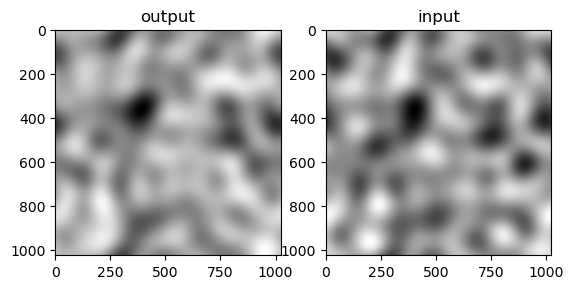

In [16]:

unlensed_cmb_power_2d = interp(ell,cmb.unlensed_spectra[:,0])(modlmap)
total_cmb_power_2d = interp(ell,cmb.lensed_spectra[:,0])(modlmap) + Clnoise/kbeam2d**2.


tmap = filter_map(observed,1/kbeam2d)

ellmin = 10
ellmax = 3000
ukappa = qe_reconstruct(tmap,unlensed_cmb_power_2d,total_cmb_power_2d,ellmin,ellmax,modlmap,ly,lx)


kellmin = 10
kellmax = 300
ukappa_f = filter_map(ukappa,kmask(modlmap*0.+1.,modlmap,kellmin,kellmax))
ikappa_f = filter_map(kappa,kmask(modlmap*0.+1.,modlmap,kellmin,kellmax))


plt.subplot(121)
plt.imshow(ukappa_f,cmap='gray')
plt.title("output")
plt.subplot(122)
plt.imshow(ikappa_f,cmap='gray')
plt.title("input")

In [17]:
L,ppo = map2cl(ukappa_f,20,300,pix_size,N)
L,ppi = map2cl(ikappa_f,20,300,pix_size,N)
L,ppoi = map2cl(ikappa_f,20,300,pix_size,N,ukappa_f)

/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/anto/Softwares/anaconda3/lib/python3.8/site-packages/numpy/core/_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


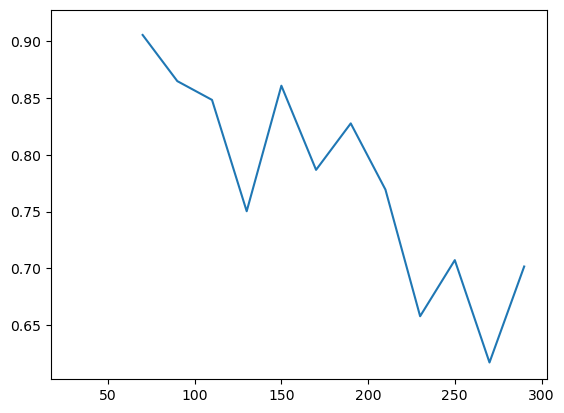

In [18]:

plt.plot(L,ppoi/np.sqrt(ppi*ppo))

In [19]:
ppoi/np.sqrt(ppi*ppo)

array([       nan, 0.60686167,        nan, 0.86373213, 0.5592192 ,
       0.84332003, 0.79215773, 0.77636754, 0.80080879, 0.65373079,
       0.78733062, 0.81804654, 0.66620561, 0.72530677, 0.6591298 ])